In [1]:
#
#Tweets Machine Learning Coursework 
#COMP3222
#

# To support both python 2 and 3
from __future__ import division, print_function, unicode_literals

# Common imports
import os
import numpy as np
import pandas as pd

# These two lines are required to use Tensorflow 1
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# To plot nice figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Clear tensorflow's and reset seed
def reset_graph(seed=None):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)



Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
#get data
def getData(file_name):
    dict_data = {}
    data_file = open(file_name, "r", encoding="utf8")
    raw_data_txt = data_file.readlines()
    raw_data = []
    for data in raw_data_txt:
        raw_data.append(data.split("\t"))
    raw_data.pop(0)

    target_text = [data[6] for data in raw_data]
    dict_data['text'] = np.array([tweet[1] for tweet in raw_data])
    dict_data['imageIds'] = np.array([tweet[3] for tweet in raw_data])
    dict_data['timestamp'] = np.array([tweet[5] for tweet in raw_data])
    dict_data['label'] = np.array([1 if target=='real' or target =='real\n' else 0 for target in target_text])

    return dict_data

df_train = pd.DataFrame.from_dict(getData("mediaeval-2015-trainingset.txt"))
df_test = pd.DataFrame.from_dict(getData("mediaeval-2015-testset.txt"))
print("Done")


Done


Train Real values:  1217
Train Fake values:  2564


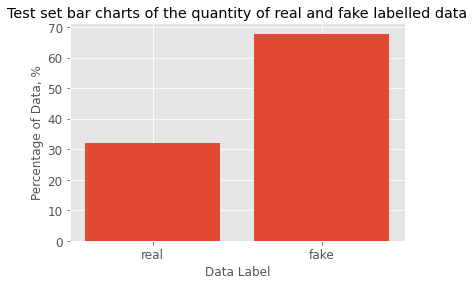

In [6]:
#Find out word count of texts.
#X_lens = [x.split(' ') for x in df_train['text'].values]
train_true = [x == 1 for x in df_test['label'].values]
print("Train Real values: ", train_true.count(1))
print("Train Fake values: ", train_true.count(0))
total_true = train_true.count(1) + train_true.count(0)
plt.style.use('ggplot')
# plt.bar(['real', 'fake'], [64/108*100, 44/108*100])
plt.bar(['real', 'fake'], [train_true.count(1)/total_true*100, train_true.count(0)/total_true*100])
plt.xlabel("Data Label")
plt.ylabel("Percentage of Data, %")
plt.title("Test set bar charts of the quantity of real and fake labelled data")
# plt.title("Training set bar charts of percentage of real and fake data\n where a news company was found")
plt.show()
#plt.hist(X_lens, 50)
#plt.show()
#Length most under 30 in length

In [39]:
#Find all the different languages
#https://meta.wikimedia.org/wiki/Template:List_of_language_names_ordered_by_code conversion of symbol to langauge table
from langdetect import detect

# x = detect('Hola estoy muy bien')
# print(x)

languages = []
for tweet in df_train['text'].values:
    try:
        languages.append(detect(tweet))
    except:
        languages.append('en')

df_train.insert(3, "language", languages, True)

languages_seen = set(languages)
print(languages_seen)




{'el', 'bg', 'ar', 'pl', 'ca', 'tr', 'cs', 'es', 'lv', 'ja', 'af', 'hi', 'lt', 'fa', 'mk', 'pt', 'ro', 'hu', 'en', 'id', 'sw', 'de', 'nl', 'zh-cn', 'hr', 'he', 'fi', 'da', 'no', 'sq', 'ko', 'tl', 'cy', 'et', 'fr', 'sl', 'it', 'sk', 'th', 'ru', 'vi', 'sv', 'so'}


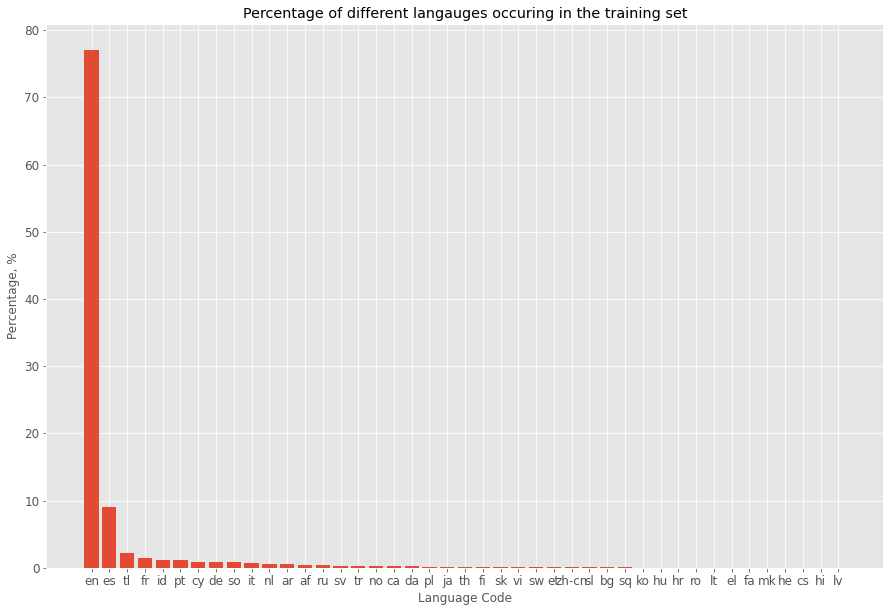

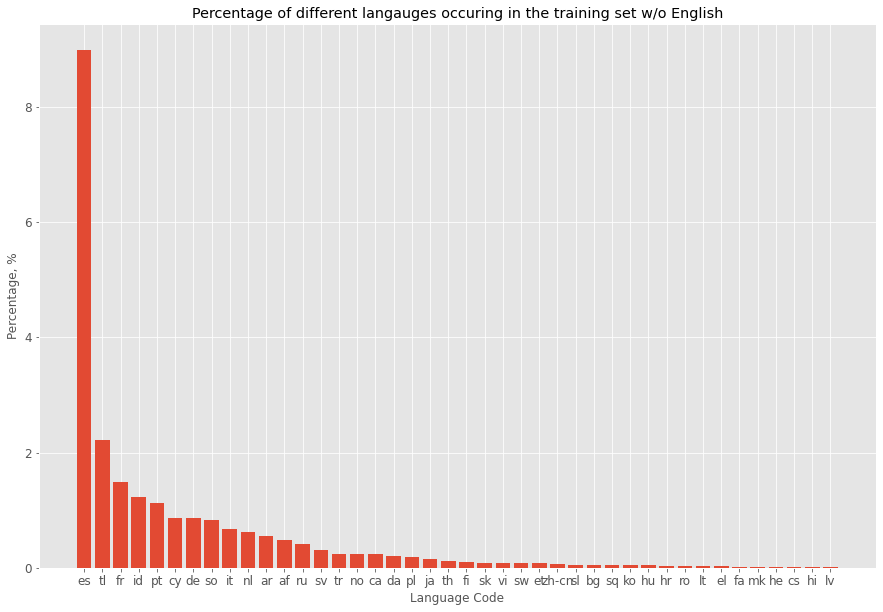

In [21]:
langs = dict(df_train['language'].value_counts())
#print(list(langs.values()))
plt.figure(figsize=(15, 10))
plt.style.use('ggplot')
plt.title("Percentage of different langauges occuring in the training set")
plt.xlabel("Language Code")
plt.ylabel("Percentage, %")
lang_codes = list(langs.keys())
lang_freq = list(langs.values())
total_freq = sum(lang_freq)
lang_pct = [x / total_freq * 100 for x in lang_freq]
plt.bar(lang_codes, lang_pct)

#Without english
plt.figure(figsize=(15, 10))
plt.style.use('ggplot')
plt.title("Percentage of different langauges occuring in the training set w/o English")
plt.xlabel("Language Code")
plt.ylabel("Percentage, %")
temp1 = lang_codes.pop(0)
temp2 = lang_pct.pop(0)
plt.bar(lang_codes, lang_pct)
plt.show()
lang_codes.insert(0, temp1)
lang_pct.insert(0, temp2)

In [22]:
lang_pct

[77.02824000552371,
 8.989850169163848,
 2.216391631568045,
 1.4983083615273078,
 1.2290271352620312,
 1.1323620796796243,
 0.8699855002416627,
 0.8561762065870331,
 0.8285576192777739,
 0.6697507422495339,
 0.6214182144583305,
 0.5454670993578679,
 0.4902299247393496,
 0.4211834564662018,
 0.3107091072291652,
 0.2416626389560174,
 0.2347579921287026,
 0.2347579921287026,
 0.20713940481944348,
 0.1933301111648139,
 0.14499758337361043,
 0.12428364289166609,
 0.09666505558240696,
 0.0828557619277774,
 0.0828557619277774,
 0.07595111510046261,
 0.07595111510046261,
 0.062141821445833044,
 0.055237174618518264,
 0.055237174618518264,
 0.04833252779120348,
 0.0414278809638887,
 0.0414278809638887,
 0.03452323413657391,
 0.03452323413657391,
 0.03452323413657391,
 0.03452323413657391,
 0.013809293654629566,
 0.013809293654629566,
 0.006904646827314783,
 0.006904646827314783,
 0.006904646827314783,
 0.006904646827314783]

In [7]:
retweets = [1 if tweet.count("RT") >= 1 else 0 for tweet in df_train["text"].values]

df_train.insert(4, "retweet", retweets, True)



Retweets Total:  1576 
Normal Total:  12907

RT fake = 785
RT real = 791
Normal Fake = 8689
Normal Real = 4218


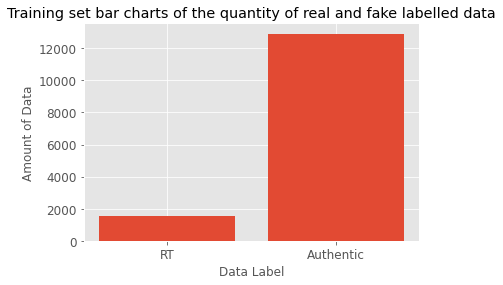

In [9]:
print("Retweets Total: ", retweets.count(1), "\nNormal Total: ", retweets.count(0))
rt_fake = 0
rt_real = 0
n_fake = 0
n_real = 0


for i in range(len(df_train)):
    if(df_train.iloc[i]['retweet'] == 1):
        if(df_train.iloc[i]['label'] == 0):
            rt_fake += 1
        else:
            rt_real += 1
    else:
        if(df_train.iloc[i]['label'] == 0):
            n_fake += 1
        else:
            n_real += 1
print("\nRT fake = {}\nRT real = {}\nNormal Fake = {}\nNormal Real = {}".format(str(rt_fake), str(rt_real), str(n_fake), str(n_real)))

plt.style.use('ggplot')
plt.bar(['RT', 'Authentic'], [retweets.count(1), retweets.count(0)])
plt.xlabel("Data Label")
plt.ylabel("Amount of Data")
plt.title("Training set bar charts of the quantity of real and fake labelled data")
plt.show()



In [7]:
import random
def getReal(df):
    idx = []
    for i in range(len(df)):
        if(df.iloc[i]['label'] == 1):
            idx.append(i)
    new_df = df.iloc[idx][:]
    return new_df

def getFake(df):
    idx = []
    for i in range(len(df)):
        if(df.iloc[i]['label'] == 0):
            idx.append(i)
    new_df = df.iloc[idx][:]
    return new_df

def balancedTrain(df_r, df_f):
    idx = []
    while(len(idx) < len(df_r)):
        x = random.randint(0, len(df_f)-1)
        if(x not in idx):
            idx.append(x)
    temp_df = df_f.iloc[idx][:]
    new_df = pd.concat([df_r, temp_df])
    return new_df.reset_index()



df_train_real = getReal(df_train)
df_train_fake = getFake(df_train)

df_balanced_train = balancedTrain(df_train_real, df_train_fake)
df_balanced_train


,index,text,imageIds,timestamp,label
0,7858,Wow RT@billmckibben: Boardwalk floating in sec...,sandyA_real_10,Mon Oct 29 20:21:37 +0000 2012,1
1,7859,@JHP_777 RT @billmckibben: Boardwalk floating ...,sandyA_real_10,Tue Oct 30 02:50:36 +0000 2012,1
2,7860,#sandy #staysafe RT @billmckibben: Boardwalk f...,sandyA_real_10,Mon Oct 29 21:00:36 +0000 2012,1
3,7861,Ground Zero #Sandy http://t.co/KA1jNv3I,sandyA_real_04,Tue Oct 30 18:47:27 +0000 2012,1
4,7862,scary: “@jfporchez: Ground zero http://t.co/wn...,sandyA_real_04,Tue Oct 30 06:20:26 +0000 2012,1
...,...,...,...,...,...
10013,3422,Les dejo una imagen impactante mostrando como ...,sandyA_fake_41,Thu Nov 01 01:36:14 +0000 2012,0
10014,728,#repost Tomb of the Unknown Soldier continues ...,sandyA_fake_02,Mon Oct 29 17:03:23 +0000 2012,0
10015,5770,Seems legit? #hurricanesandy --&gt; http://t.c...,sandyA_fake_45,Wed Oct 31 00:04:57 +0000 2012,0
10016,2347,Sandy is looking pretty fed up. #nyc #nj #conn...,sandyA_fake_48,Mon Oct 29 18:27:18 +0000 2012,0


In [25]:
from langdetect import detect

# x = detect('Hola estoy muy bien')
# print(x)

languages = []
for tweet in df_balanced_train['text'].values:
    try:
        languages.append(detect(tweet))
    except:
        languages.append('en')

df_balanced_train.insert(3, "language", languages, True)

languages_seen = set(languages)
print(languages_seen)

{'sw', 'lt', 'de', 'en', 'pl', 'sv', 'da', 'nl', 'sl', 'ar', 'ko', 'fa', 'lv', 'no', 'tr', 'af', 'el', 'fi', 'bg', 'hu', 'so', 'ru', 'ja', 'th', 'cy', 'sk', 'id', 'tl', 'hr', 'ca', 'mk', 'sq', 'ro', 'es', 'cs', 'zh-cn', 'et', 'pt', 'it', 'vi', 'fr'}


In [28]:
lang_dict = {}

for lang in languages_seen:
    lang_dict[lang] = [0, 0]

for i in range(len(df_balanced_train)):
    if(df_balanced_train.iloc[i]["label"]==1):
        lang_dict[df_balanced_train.iloc[i]["language"]][0] += 1
    else:
        lang_dict[df_balanced_train.iloc[i]["language"]][1] += 1

for lang in languages_seen:
    try:
        lang_dict[lang] = lang_dict[lang][1] / (lang_dict[lang][0] + lang_dict[lang][1])
    except:
        print("Not Found:", lang)
        del lang_dict[lang]
    
lang_dict = dict(sorted(lang_dict.items(), reverse=True, key=lambda item: item[1]))

41


<BarContainer object of 41 artists>

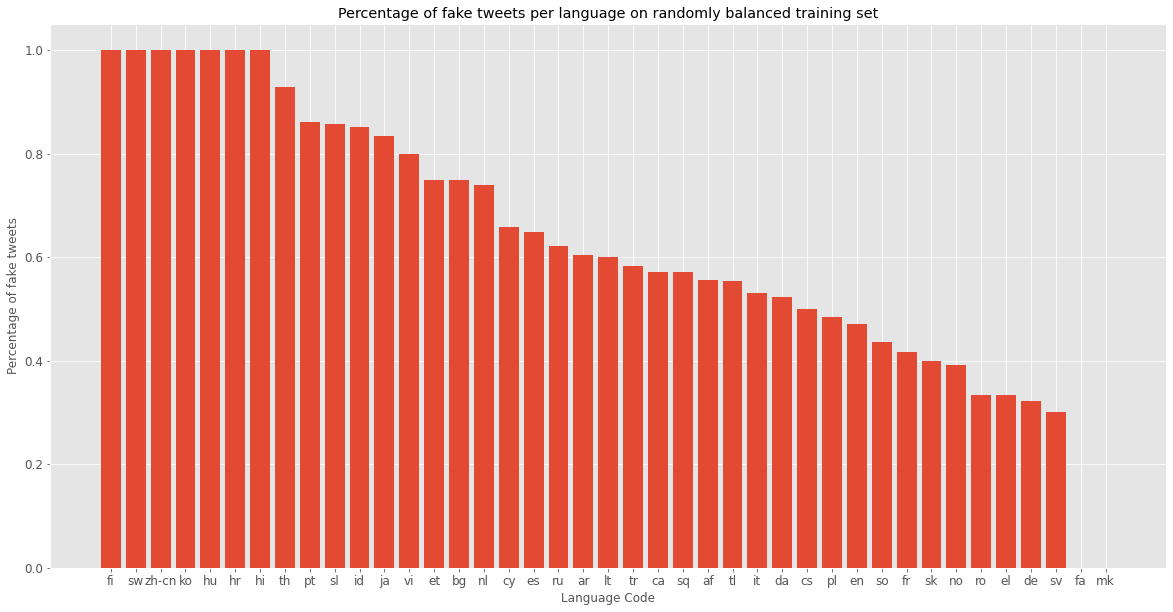

In [54]:
plt.figure(figsize=(20, 10))
plt.style.use('ggplot')
plt.title("Percentage of fake tweets per language on randomly balanced training set")
plt.xlabel("Language Code")
plt.ylabel("Percentage of fake tweets") 
lang_codes2 = list(lang_dict.keys())
print(len(lang_codes2))
lang_fake_pct = list(lang_dict.values())
plt.bar(lang_dict.keys(), lang_dict.values())

In [63]:
count = 0
for i in range(len(df_balanced_train)):
    if(df_balanced_train.iloc[i]['language'] in a_langs):
        count+=1
print(count)

14


In [73]:
a_langs = []
for (k, v) in lang_dict.items():
    if(v>0.40 and v<0.65):
        a_langs.append(k)

count = 0
for i in range(len(df_balanced_train)):
    if(df_balanced_train.iloc[i]['language'] in a_langs):
        count+=1
print(count)

9441


In [29]:
from deep_translator import GoogleTranslator
#x = GoogleTranslator(source='auto', target='en').translate("Hello how are you")
translate_text = {}
for i in range(len(df_balanced_train)):
    if(df_balanced_train.iloc[i]['language'] != 'en'):
        translate_text[df_balanced_train.iloc[i]['text']] = GoogleTranslator(source='auto', target='en').translate(df_balanced_train.iloc[i]['text'])
        print(i, df_balanced_train.iloc[i]['language'], GoogleTranslator(source='auto', target='en').translate(df_balanced_train.iloc[i]['text']))

translate_text

4 pl scary: “@jfporchez: Ground zero http://t.co/wn8wZzHk #sandy”
10 it #Sandy, cascading water in the Ground Zero construction site http://t.co/5VfDnIZ3
17 tl Man.....Ground zero #sandy RT @AmayaRR: jasminesolano's photo http://t.co/t9tx0IiW
24 af Ground Zero is underwater! #unreal #lookslikeadisastermovie #sandy #flooding http://t.co/b5WWPaO4
25 it Ground Zero construction site is totally flooded #sandy #ny #newyork http://t.co/UUi1h4Tv
32 it Flooded Ground Zero, photo is impressive https://t.co/mbkj6ReK (via @NewYorkPost) #sandy #newyork
43 es RT @AdrianBono: [PHOTO] Awesome image from @AP. Ground Zero is flooded, where the Twin Towers were. #Sandy https://t.co/AHpGt1kY
66 cy “@nynewsn: Waterfalls of #GroundZero\nhttp://t.co/rcG40ZyC #nyc #newyork #sandy” @OzgeMemisoglu look where you were the other day!
68 pl #groundzero flooding.   Crazy #nyc #sandy http://t.co/nB1Q4aTl
83 it The iconic image of NY today is the cascading water in the Ground Zero construction site #Sandy \ nhttp: /

{'scary: “@jfporchez: Ground zero http://t.co/wn8wZzHk #sandy”': 'scary: “@jfporchez: Ground zero http://t.co/wn8wZzHk #sandy”',
 "#Sandy, l'acqua a cascata nel cantiere di Ground Zero http://t.co/5VfDnIZ3": '#Sandy, cascading water in the Ground Zero construction site http://t.co/5VfDnIZ3',
 "Man.....Ground zero #sandy RT @AmayaRR: jasminesolano's photo http://t.co/t9tx0IiW": "Man.....Ground zero #sandy RT @AmayaRR: jasminesolano's photo http://t.co/t9tx0IiW",
 'Ground Zero is underwater! #unreal #lookslikeadisastermovie #sandy #flooding http://t.co/b5WWPaO4': 'Ground Zero is underwater! #unreal #lookslikeadisastermovie #sandy #flooding http://t.co/b5WWPaO4',
 'Il cantiere di Ground Zero è totalmente allagato #sandy #ny #newyork http://t.co/UUi1h4Tv': 'Ground Zero construction site is totally flooded #sandy #ny #newyork http://t.co/UUi1h4Tv',
 'Allagata Ground Zero, la foto è impressionante https://t.co/mbkj6ReK (via @NewYorkPost) #sandy #newyork': 'Flooded Ground Zero, photo is impre

In [46]:
df_train

,text,imageIds,timestamp,language,retweet,label
0,¿Se acuerdan de la película: “El día después d...,sandyA_fake_46,Mon Oct 29 22:34:01 +0000 2012,es,0,0
1,@milenagimon: Miren a Sandy en NY! Tremenda i...,sandyA_fake_09,Mon Oct 29 19:11:23 +0000 2012,es,1,0
2,"Buena la foto del Huracán Sandy, me recuerda a...",sandyA_fake_09,Mon Oct 29 18:11:08 +0000 2012,es,0,0
3,Scary shit #hurricane #NY http://t.co/e4JLBUfH,sandyA_fake_29,Mon Oct 29 19:15:33 +0000 2012,en,0,0
4,My fave place in the world #nyc #hurricane #sa...,sandyA_fake_15,Mon Oct 29 20:46:02 +0000 2012,en,0,0
...,...,...,...,...,...,...
14478,@BobombDom *slaps TweetDeck with the PigFish h...,pigFish_01,Tue Mar 11 03: 48: 36 +0000 2014,en,0,0
14479,New Species of Fish found in Brazil or just Re...,pigFish_01,Mon Mar 10 18: 09: 26 +0000 2014,en,0,0
14480,What do we call this? #pigFISH http: \/\/t.co\...,pigFish_01,Mon Mar 10 10: 59: 45 +0000 2014,en,0,0
14481,Pigfish ? E dopo il pescecane c'è il pesce mai...,pigFish_01,Sun Mar 09 20: 07: 10 +0000 2014,it,0,0


In [30]:
#pre-processing
df_balanced_train["text"].replace(translate_text, inplace=True)

In [31]:
df_balanced_train

,index,text,imageIds,language,timestamp,misspellings,num_emoji,label
0,7858,Wow RT@billmckibben: Boardwalk floating in sec...,sandyA_real_10,en,Mon Oct 29 20:21:37 +0000 2012,4,0,1
1,7859,@JHP_777 RT @billmckibben: Boardwalk floating ...,sandyA_real_10,en,Tue Oct 30 02:50:36 +0000 2012,5,0,1
2,7860,#sandy #staysafe RT @billmckibben: Boardwalk f...,sandyA_real_10,en,Mon Oct 29 21:00:36 +0000 2012,5,0,1
3,7861,Ground Zero #Sandy http://t.co/KA1jNv3I,sandyA_real_04,en,Tue Oct 30 18:47:27 +0000 2012,2,0,1
4,7862,scary: “@jfporchez: Ground zero http://t.co/wn...,sandyA_real_04,pl,Tue Oct 30 06:20:26 +0000 2012,5,0,1
...,...,...,...,...,...,...,...,...
10013,3422,I leave you a shocking image showing how peopl...,sandyA_fake_41,es,Thu Nov 01 01:36:14 +0000 2012,5,0,0
10014,728,#repost Tomb of the Unknown Soldier continues ...,sandyA_fake_02,en,Mon Oct 29 17:03:23 +0000 2012,3,0,0
10015,5770,Seems legit? #hurricanesandy --&gt; http://t.c...,sandyA_fake_45,en,Wed Oct 31 00:04:57 +0000 2012,5,0,0
10016,2347,Sandy is looking pretty fed up. #nyc #nj #conn...,sandyA_fake_48,en,Mon Oct 29 18:27:18 +0000 2012,6,0,0


In [92]:
#save file pre-processing to csv
# df_train.to_csv('train_v4.csv')

In [13]:
df_train = pd.read_csv("train_v2.2.csv")
df_train = df_train.iloc[:, 1:]
df_train

df_test = pd.read_csv("test_v2.2.csv")
df_test = df_test.iloc[:, 1:]
df_test

,text,pos,imageIds,timestamp,language,profane,misspellings,num_emoji,label
0,kereeen rt eclipse iss,JJ NN NN NN,eclipse_01,1426844743,en,0,2,0,0
1,absolutely beautiful rt eclipse iss,RB JJ NN NN NN,eclipse_01,1426849442,en,0,1,0,0
2,eclipse iss 3 20 wow amazing,NN VBZ CD CD NN NN,eclipse_01,1426853406,en,0,0,0,0
3,eclipse iss,NN NN,eclipse_01,1426842761,en,0,0,0,0
4,eclipse seen iss something else divine creatio...,NN VBN JJ NN RB JJ NN NN,eclipse_01,1426873451,fr,0,0,1,0
...,...,...,...,...,...,...,...,...,...
3776,zdf presenter confesses rigged video varoufaki...,NN NN NNS VBD NN NN NN JJ NN IN,varoufakis_1,1426744184,fr,0,2,0,0
3777,oh kleine liars zdf presenter confesses faked ...,UH NN NNS VBP NN NNS VBD JJ NN NN,varoufakis_1,1426744302,fr,0,2,0,0
3778,zdf program confirm varoufakis video montage,NN NN NN VBZ JJ NN,varoufakis_1,1426757001,es,0,2,0,0
3779,11 34 almost noon big confusion varoufakis vid...,CD CD RB RB JJ NN NN NN NN JJ NN NN NN,varoufakis_1,1426761320,de,0,4,2,0


In [ ]:
#Erroneous language detection that will pass through
from langdetect import detect_langs
detect_langs("Facshareされまくってる画像。\n#sandy #ny #nyc #hurricane")

[en:0.9999944787510273]

In [54]:
import spacy
from profanity_filter import ProfanityFilter

nlp = spacy.load('en_core_web_sm')
profanity_filter = ProfanityFilter(nlps={'en': nlp})  # reuse spacy Language (optional)
nlp.add_pipe(profanity_filter.spacy_component, last=True)

doc = nlp('This is fuck shit!')

doc._.is_profane
profanity_check = []
count = 0
for tweet in df_train['text'].values:
    text = nlp(tweet)
    if(text._.is_profane):
        profanity_check.append(1)
    else: 
        profanity_check.append(0)
    
    print(count, text._.is_profane)
    count += 1
    

print(profanity_check.count(1))
profanity_check

0 False
1 False
2 False
3 True
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 True
53 False
54 False
55 False
56 False
57 False
58 False
59 False
60 False
61 False
62 False
63 False
64 False
65 False
66 False
67 False
68 False
69 True
70 False
71 True
72 False
73 False
74 False
75 False
76 False
77 False
78 False
79 False
80 False
81 True
82 False
83 False
84 False
85 False
86 False
87 False
88 False
89 False
90 False
91 False
92 True
93 False
94 False
95 False
96 False
97 True
98 False
99 False
100 False
101 False
102 False
103 False
104 False
105 False
106 False
107 False
108 False
109 False
110 False
111 Tru

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,


In [94]:
#df_train.insert(4, "profane", profanity_check, True)
df_train

,text,imageIds,timestamp,label
0,¿Se acuerdan de la película: “El día después d...,sandyA_fake_46,Mon Oct 29 22:34:01 +0000 2012,0
1,@milenagimon: Miren a Sandy en NY! Tremenda i...,sandyA_fake_09,Mon Oct 29 19:11:23 +0000 2012,0
2,"Buena la foto del Huracán Sandy, me recuerda a...",sandyA_fake_09,Mon Oct 29 18:11:08 +0000 2012,0
3,Scary shit #hurricane #NY http://t.co/e4JLBUfH,sandyA_fake_29,Mon Oct 29 19:15:33 +0000 2012,0
4,My fave place in the world #nyc #hurricane #sa...,sandyA_fake_15,Mon Oct 29 20:46:02 +0000 2012,0
...,...,...,...,...
14478,@BobombDom *slaps TweetDeck with the PigFish h...,pigFish_01,Tue Mar 11 03: 48: 36 +0000 2014,0
14479,New Species of Fish found in Brazil or just Re...,pigFish_01,Mon Mar 10 18: 09: 26 +0000 2014,0
14480,What do we call this? #pigFISH http: \/\/t.co\...,pigFish_01,Mon Mar 10 10: 59: 45 +0000 2014,0
14481,Pigfish ? E dopo il pescecane c'è il pesce mai...,pigFish_01,Sun Mar 09 20: 07: 10 +0000 2014,0


In [163]:
#Spell checker test code
from spellchecker import SpellChecker

spell = SpellChecker()
test = "Hello how witt are you"
test = test.split(" ")
test

# find those words that may be misspelled
misspelled = spell.unknown(test)
misspelling_found = False
for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))
    if(len(spell.candidates(word))>0):
        misspelling_found = True
        break

print(misspelling_found)

False


In [149]:

num_hashtags = []
for i in range(len(df_balanced_train)):
    num_hashtags.append(df_balanced_train.iloc[i]['text'].count("#"))
#maybe count number of punctuation as well.


In [150]:
df_balanced_train.insert(4, "num_hashtags", num_hashtags, True)
df_balanced_train

,index,text,imageIds,language,num_hashtags,num_emoji,timestamp,label
0,7858,Wow RT@billmckibben: Boardwalk floating in sec...,sandyA_real_10,en,1,0,Mon Oct 29 20:21:37 +0000 2012,1
1,7859,@JHP_777 RT @billmckibben: Boardwalk floating ...,sandyA_real_10,en,1,0,Tue Oct 30 02:50:36 +0000 2012,1
2,7860,#sandy #staysafe RT @billmckibben: Boardwalk f...,sandyA_real_10,en,3,0,Mon Oct 29 21:00:36 +0000 2012,1
3,7861,Ground Zero #Sandy http://t.co/KA1jNv3I,sandyA_real_04,en,1,0,Tue Oct 30 18:47:27 +0000 2012,1
4,7862,scary: “@jfporchez: Ground zero http://t.co/wn...,sandyA_real_04,pl,1,0,Tue Oct 30 06:20:26 +0000 2012,1
...,...,...,...,...,...,...,...,...
10013,13799,Good to see @BBCSteveR's double toilets in Soc...,sochi_fake_9,en,0,0,Tue Jan 28 09:54:23 +0000 2014,0
10014,3447,Hurricane Sandy brings all the sharks to my ya...,sandyA_fake_11,en,0,0,Sat Nov 03 18:50:47 +0000 2012,0
10015,493,Sandy's #Hurricane in NY http://t.co/I25vmdJd,sandyA_fake_34,en,1,0,Tue Oct 30 06:54:57 +0000 2012,0
10016,13410,... now he can't leave the country *pukpuk si ...,passport_02,en,0,0,Wed Jun 04 21:55:06 +0000 2014,0


In [9]:
import emoji
import regex

print(emoji.emoji_count(" ☁⚡☔🌊"))

4


In [75]:
#https://unicode.org/emoji/charts/full-emoji-list.html Emoji unicode max unicode character in the list is af6 with minimum being 004
#emoji count with unicode range
import emoji
s="My cousin sent this to me... :: Cleveland voice :: We gon' die!!! ☁⚡☔🌊 #hurricane #hurricanesandy #sandy http://t.co/XtW4exLns"
count = emoji.emoji_count(s)
print(count)

4


In [10]:
num_emojis = []
for i in range(len(df_balanced_train)):
    emoji_count = emoji.emoji_count(df_balanced_train.iloc[i]['text'])
    num_emojis.append(emoji.emoji_count(df_balanced_train.iloc[i]['text']))
    #print(i)

print(max(num_emojis))
#print(num_emojis)



79


In [11]:
df_balanced_train.insert(4, "num_emoji", num_emojis, True)
df_balanced_train

,index,text,imageIds,timestamp,num_emoji,label
0,7858,Wow RT@billmckibben: Boardwalk floating in sec...,sandyA_real_10,Mon Oct 29 20:21:37 +0000 2012,0,1
1,7859,@JHP_777 RT @billmckibben: Boardwalk floating ...,sandyA_real_10,Tue Oct 30 02:50:36 +0000 2012,0,1
2,7860,#sandy #staysafe RT @billmckibben: Boardwalk f...,sandyA_real_10,Mon Oct 29 21:00:36 +0000 2012,0,1
3,7861,Ground Zero #Sandy http://t.co/KA1jNv3I,sandyA_real_04,Tue Oct 30 18:47:27 +0000 2012,0,1
4,7862,scary: “@jfporchez: Ground zero http://t.co/wn...,sandyA_real_04,Tue Oct 30 06:20:26 +0000 2012,0,1
...,...,...,...,...,...,...
10013,3422,Les dejo una imagen impactante mostrando como ...,sandyA_fake_41,Thu Nov 01 01:36:14 +0000 2012,0,0
10014,728,#repost Tomb of the Unknown Soldier continues ...,sandyA_fake_02,Mon Oct 29 17:03:23 +0000 2012,0,0
10015,5770,Seems legit? #hurricanesandy --&gt; http://t.c...,sandyA_fake_45,Wed Oct 31 00:04:57 +0000 2012,0,0
10016,2347,Sandy is looking pretty fed up. #nyc #nj #conn...,sandyA_fake_48,Mon Oct 29 18:27:18 +0000 2012,0,0


In [100]:
#regex of tweet only string
import regex as re
x = "“@Dead_byte: Got the shark pic on my freinds front lawn #sandy #what http://t.co/MvMssAVI” my friend fuerza y determinacion, ya pasara todo"
y = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split())
print(y)


byte Got the shark pic on my freinds front lawn sandy what my friend fuerza y determinacion ya pasara todo


In [189]:
#some urls have a space in them stopping them from being parsed correctly
#not executed as 30 occurrences in 14000 very minimal

tweet = "For those who can't decide between fish or meat.....#Pigfish http: \/\/t.co\/5JBtF54cmg"
idx = tweet.index("http: ")
idx = idx + 5
tweet = tweet[:idx] + tweet[idx+1:]
print(idx)
print(tweet[:idx])
print(tweet[idx+1:])
print(tweet)

y = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
print(y)

# urlfix_text = {}
# for i in range(len(df_train)):
#     if(df_train.iloc[i]['text'].count("http: ") >0):
#         tweet = df_train.iloc[i]['text']
#         idx = tweet.count("http: ")
#         idx = idx + 6
#         translate_text[df_train.iloc[i]['text']] = GoogleTranslator(source='auto', target='en').translate(df_train.iloc[i]['text'])
#         print(i, df_train.iloc[i]['language'], GoogleTranslator(source='auto', target='en').translate(df_train.iloc[i]['text']))

# translate_text

66
For those who can't decide between fish or meat.....#Pigfish http:
/\/t.co\/5JBtF54cmg
For those who can't decide between fish or meat.....#Pigfish http:\/\/t.co\/5JBtF54cmg
For those who can t decide between fish or meat Pigfish http t co 5JBtF54cmg


In [49]:
import regex as re
parsed_text = {}
for i in range(len(df_balanced_train)):
    parsed = ' '.join(re.sub("(@[A-Za-z0-9_]+)|((\\\/\\\/\w+.co\S+)|(\w+:\/\/\S+))|([^0-9A-Za-z \t])"," ",df_balanced_train.iloc[i]['text']).split())
    parsed_text[df_balanced_train.iloc[i]['text']] = parsed
    print(i, parsed)

parsed_text
    

0 Wow RT Boardwalk floating in sections through the flooded streets of Atlantic City sandy
1 RT Boardwalk floating in sections through the flooded streets of Atlantic City sandy
2 sandy staysafe RT Boardwalk floating in sections through the flooded streets of Atlantic City sandy
3 Ground Zero Sandy
4 scary Ground zero sandy
5 SANDY IMPACT Ground Zero via attn
6 Amazing photo RT Flooding has turned Ground Zero into a waterfall photo NYC Sandy
7 Water pouring into Ground Zero Sandy
8 Amazing shot by an AP photographer of water pouring into Ground Zero construction site Superstorm Sandy
9 whoa ground zero is flooded Sandy
10 Sandy cascading water in the Ground Zero construction site
11 Incredible picture of water filling the construction site at ground zero NYC flooding sandy
12 Ground Zero Under Water is pretty sad frankenstorm hurricane sandy newyork nyc storm floodings fl
13 Woah RT This photo from Ground Zero in NYC says it all on Sandy there Credit
14 crazy photo of ground zero being

{'Wow RT@billmckibben: Boardwalk floating in sections through the flooded streets of Atlantic City http://t.co/Qp3JDvZb #sandy': 'Wow RT Boardwalk floating in sections through the flooded streets of Atlantic City sandy',
 '@JHP_777 RT @billmckibben: Boardwalk floating in sections through the flooded streets of Atlantic City http://t.co/ELU9F89q #sandy': 'RT Boardwalk floating in sections through the flooded streets of Atlantic City sandy',
 '#sandy #staysafe RT @billmckibben: Boardwalk floating in sections through the flooded streets of Atlantic City http://t.co/QMcqLQss #sandy': 'sandy staysafe RT Boardwalk floating in sections through the flooded streets of Atlantic City sandy',
 'Ground Zero #Sandy http://t.co/KA1jNv3I': 'Ground Zero Sandy',
 'scary: “@jfporchez: Ground zero http://t.co/wn8wZzHk #sandy”': 'scary Ground zero sandy',
 '#SANDY IMPACT: Ground Zero http://t.co/qGbk7voa (via @BuzzFeedAndrew) (attn: @ShafaqHasan)': 'SANDY IMPACT Ground Zero via attn',
 'Amazing photo RT @W

In [50]:
df_balanced_train["text"].replace(parsed_text, inplace=True)
df_balanced_train

C:\Users\borin\anaconda3\envs\coursework\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,index,text,imageIds,timestamp,language,num_emoji,label
0,7858,Wow RT Boardwalk floating in sections through ...,sandyA_real_10,Mon Oct 29 20:21:37 +0000 2012,en,0,1
1,7859,RT Boardwalk floating in sections through the ...,sandyA_real_10,Tue Oct 30 02:50:36 +0000 2012,en,0,1
2,7860,sandy staysafe RT Boardwalk floating in sectio...,sandyA_real_10,Mon Oct 29 21:00:36 +0000 2012,en,0,1
3,7861,Ground Zero Sandy,sandyA_real_04,Tue Oct 30 18:47:27 +0000 2012,en,0,1
4,7862,scary Ground zero sandy,sandyA_real_04,Tue Oct 30 06:20:26 +0000 2012,pl,0,1
...,...,...,...,...,...,...,...
10013,3422,I leave you a shocking image showing how peopl...,sandyA_fake_41,Thu Nov 01 01:36:14 +0000 2012,es,0,0
10014,728,repost Tomb of the Unknown Soldier continues t...,sandyA_fake_02,Mon Oct 29 17:03:23 +0000 2012,en,0,0
10015,5770,Seems legit hurricanesandy gt,sandyA_fake_45,Wed Oct 31 00:04:57 +0000 2012,en,0,0
10016,2347,Sandy is looking pretty fed up nyc nj conn bro...,sandyA_fake_48,Mon Oct 29 18:27:18 +0000 2012,en,0,0


In [188]:
#based of https://craft.co/cnn/competitors
#
news_companies =["cnn", "bbc", "nbc", "new york times", "wall street journal", " ap ", "fox", "cnbc", "daily mail"]
news_found = []
for tweet in df_train['text'].values:
    tweet = tweet.lower()
    if(any(news in tweet for news in news_companies) or (tweet.find('ap') == 0) or (tweet.find('ap') == len(tweet)-2) ) :
        news_found.append(1)
    else:
        news_found.append(0)

news_found.count(1)

108

In [238]:
x = "a p edkwd jo vwd  wji ap"
y = x.find('hello')
print(y)
x.find('ap') == len(x)-2

-1


True

In [187]:
df_train.insert(4, "news", news_found, True)

In [189]:
df_train

,text,imageIds,timestamp,language,news,news_company,misspellings,news_company_found,num_emoji,num_hashtags,profane,retweet,label
0,remember movie Day Tomorrow reminds happening ...,sandyA_fake_46,Mon Oct 29 22:34:01 +0000 2012,es,0,0,0,0,0,1,0,0,0
1,Look Sandy NY Tremendous image hurricane Looks...,sandyA_fake_09,Mon Oct 29 19:11:23 +0000 2012,es,0,0,1,0,0,0,0,1,0
2,Good photo Hurricane Sandy reminds movie Indep...,sandyA_fake_09,Mon Oct 29 18:11:08 +0000 2012,es,0,0,1,0,0,2,0,0,0
3,Scary shit hurricane NY,sandyA_fake_29,Mon Oct 29 19:15:33 +0000 2012,en,0,0,0,0,0,2,1,0,0
4,fave place world nyc hurricane sandy statueofl...,sandyA_fake_15,Mon Oct 29 20:46:02 +0000 2012,en,0,0,2,0,1,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14478,slaps TweetDeck PigFish http co pyHcJn0jwA,pigFish_01,Tue Mar 11 03: 48: 36 +0000 2014,en,0,0,4,0,0,0,0,0,0
14479,New Species Fish found Brazil Really good Phot...,pigFish_01,Mon Mar 10 18: 09: 26 +0000 2014,en,0,0,2,0,0,0,0,0,0
14480,call pigFISH http co 4Bml62OD15,pigFish_01,Mon Mar 10 10: 59: 45 +0000 2014,en,0,0,3,0,0,1,0,0,0
14481,Pigfish shark pork fish http co hQzWGhyDef,pigFish_01,Sun Mar 09 20: 07: 10 +0000 2014,it,0,0,3,0,0,0,0,0,0


In [266]:
#location detector too much noise picked up

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="COMP322-MLT")
x = "My fave place in the world nyc hurricane sandy times sqaure"
x = x.split(' ')
for i in range(len(x)):
    try:
        location = geolocator.geocode(x[i])
        print(location.address)
    except:
        print("Notfound")

United States
Fave, Jalan Cihampelas, Cipaganti, Coblong, Bandung, Jawa Barat, 40131, Indonesia
Placé, Mayenne, Pays de la Loire, France métropolitaine, 53240, France
India
The (Oval) Banqueting Suite, 372, Stratford Road, Moseley, Sparkhill, Birmingham, West Midlands Combined Authority, West Midlands, England, B11 4AB, United Kingdom
World, Governor Drive, University City, San Diego, San Diego County, California, 92122, United States
New York, United States
Hurricane, City Of Karratha, Western Australia, Australia
Sandy, Salt Lake County, Utah, United States
Кожай-Семёновка, Кожай-Семеновский сельсовет, Миякинский район, Башкортостан, Приволжский федеральный округ, Россия
Barkman Sqaure, Midland, Midland County, Texas, 79705, United States


In [19]:
#Run hashtags if first time running on machine

from nltk.corpus import stopwords
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.tokenize import word_tokenize
 
example_sent = "This is a sample sentence, showing off the stop words filtration."
 
stop_words = set(stopwords.words('english'))
 
word_tokens = word_tokenize(example_sent)
 
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
 
filtered_sentence = []
 
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
 
print(word_tokens)
print(filtered_sentence)


['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
['This', 'sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


In [278]:
filtered_text = {}
for i in range(len(df_train)):
    word_tokens = word_tokenize(df_train.iloc[i]['text'])
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    new_sentence = " ".join(filtered_sentence)
    filtered_text[df_train.iloc[i]['text']] = new_sentence
    print(i, new_sentence)

0 remember movie Day Tomorrow reminds happening Hurricane Sandy
1 Look Sandy NY Tremendous image hurricane Looks like Independence Day 2 REAL RT
2 Good photo Hurricane Sandy reminds movie Independence Day ID4 Sandy
3 Scary shit hurricane NY
4 fave place world nyc hurricane sandy statueofliberty
5 42nd time square NYC subway hurricane
6 time halloween photo hurricane sandy frankenstorm
7 Crazy pic Hurricane Sandy prayers go family friends East Coast
8 sandy newyork hurricane statueofliberty USA
9 nyc hurricane
10 robertosalibaba god u brother sandy hurricane newyork
11 Crazy Hurricane Sandy
12 shark newjersey swim sandy hurricane
13 Good luck ny newyork usa hurricane sandy
14 Wow Fishing anyone hurricane sandy
15 Well howdy hurricane sandy wanted let know took power internet amp amp happi
16 known bcs jason chen updated pic Everyone safe newyork sandy hurricane nature e
17 thoughts prayers go people going thru hurricane sandy ct de md nc nh nj
18 Stay safe New York family nyc newyork st

In [279]:
df_train["text"].replace(filtered_text, inplace=True)
df_train

,text,imageIds,timestamp,language,news_company_found,num_emoji,num_hashtags,profane,retweet,label
0,remember movie Day Tomorrow reminds happening ...,sandyA_fake_46,Mon Oct 29 22:34:01 +0000 2012,es,0,0,1,0,0,0
1,Look Sandy NY Tremendous image hurricane Looks...,sandyA_fake_09,Mon Oct 29 19:11:23 +0000 2012,es,0,0,0,0,1,0
2,Good photo Hurricane Sandy reminds movie Indep...,sandyA_fake_09,Mon Oct 29 18:11:08 +0000 2012,es,0,0,2,0,0,0
3,Scary shit hurricane NY,sandyA_fake_29,Mon Oct 29 19:15:33 +0000 2012,en,0,0,2,1,0,0
4,fave place world nyc hurricane sandy statueofl...,sandyA_fake_15,Mon Oct 29 20:46:02 +0000 2012,en,0,1,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...
14478,slaps TweetDeck PigFish http co pyHcJn0jwA,pigFish_01,Tue Mar 11 03: 48: 36 +0000 2014,en,0,0,0,0,0,0
14479,New Species Fish found Brazil Really good Phot...,pigFish_01,Mon Mar 10 18: 09: 26 +0000 2014,en,0,0,0,0,0,0
14480,call pigFISH http co 4Bml62OD15,pigFish_01,Mon Mar 10 10: 59: 45 +0000 2014,en,0,0,1,0,0,0
14481,Pigfish shark pork fish http co hQzWGhyDef,pigFish_01,Sun Mar 09 20: 07: 10 +0000 2014,it,0,0,0,0,0,0


In [48]:
df_balanced_train

,index,text,imageIds,timestamp,language,num_emoji,label
0,7858,Wow RT@billmckibben: Boardwalk floating in sec...,sandyA_real_10,Mon Oct 29 20:21:37 +0000 2012,en,0,1
1,7859,@JHP_777 RT @billmckibben: Boardwalk floating ...,sandyA_real_10,Tue Oct 30 02:50:36 +0000 2012,en,0,1
2,7860,#sandy #staysafe RT @billmckibben: Boardwalk f...,sandyA_real_10,Mon Oct 29 21:00:36 +0000 2012,en,0,1
3,7861,Ground Zero #Sandy http://t.co/KA1jNv3I,sandyA_real_04,Tue Oct 30 18:47:27 +0000 2012,en,0,1
4,7862,scary: “@jfporchez: Ground zero http://t.co/wn...,sandyA_real_04,Tue Oct 30 06:20:26 +0000 2012,pl,0,1
...,...,...,...,...,...,...,...
10013,3422,I leave you a shocking image showing how peopl...,sandyA_fake_41,Thu Nov 01 01:36:14 +0000 2012,es,0,0
10014,728,#repost Tomb of the Unknown Soldier continues ...,sandyA_fake_02,Mon Oct 29 17:03:23 +0000 2012,en,0,0
10015,5770,Seems legit? #hurricanesandy --&gt; http://t.c...,sandyA_fake_45,Wed Oct 31 00:04:57 +0000 2012,en,0,0
10016,2347,Sandy is looking pretty fed up. #nyc #nj #conn...,sandyA_fake_48,Mon Oct 29 18:27:18 +0000 2012,en,0,0


In [47]:
df_balanced_train = df_balanced_train[['index', 'text', 'imageIds', 'timestamp', 'language', 'num_emoji', 'label']]


In [17]:
#Spell checker test code
from spellchecker import SpellChecker

spell = SpellChecker()
test = "."
test = test.split(" ")
test

# find those words that may be misspelled
misspelled_test = spell.unknown(test)
misspelling_found_test = False
misspell_count_test = 0
#print(misspelled)
for word_test in misspelled_test:

    # Get a list of `likely` options
    #print(spell.candidates(word))
    if(len(spell.candidates(word_test))>0):
        misspelling_found_test = True
        break


print(len(misspelled_test))

0


In [51]:
misspelled_count = []
for i in range(len(df_balanced_train)):
    word_list = word_tokenize(df_balanced_train.iloc[i]['text'])
    misspelled = spell.unknown(word_list)
    misspelled_count.append(len(misspelled))
    print(i, len(misspelled), misspelled)

#print("Max misspelt:", max(misspelled_count))

0 1 {'rt'}
1 1 {'rt'}
2 2 {'rt', 'staysafe'}
3 0 set()
4 0 set()
5 1 {'attn'}
6 2 {'rt', 'nyc'}
7 0 set()
8 0 set()
9 0 set()
10 0 set()
11 1 {'nyc'}
12 4 {'newyork', 'fl', 'nyc', 'frankenstorm'}
13 2 {'rt', 'nyc'}
14 0 set()
15 0 set()
16 4 {'groundzero', 'hurricanesandy', 'wtc', 'nyc'}
17 3 {'s', 'rt', 'jasminesolano'}
18 1 {'rt'}
19 0 set()
20 1 {'nrt'}
21 0 set()
22 0 set()
23 1 {'kelsomer'}
24 1 {'lookslikeadisastermovie'}
25 1 {'newyork'}
26 3 {'minchillo', 'rt', 'nyc'}
27 1 {'wtc'}
28 0 set()
29 0 set()
30 0 set()
31 2 {'60minutes', 'nyc'}
32 1 {'newyork'}
33 1 {'silenthill'}
34 1 {'rt'}
35 1 {'rt'}
36 2 {'rt', 'sayingaprayerforny'}
37 2 {'godbless', 'hurricanesandy'}
38 1 {'nyc'}
39 3 {'rt', 'nyc', 'hurricanesandy'}
40 1 {'manhattanny'}
41 1 {'nyc'}
42 2 {'tweetcaster', 'nyc'}
43 1 {'rt'}
44 2 {'rt', 'nyc'}
45 2 {'nyc', 'hurricanesandy'}
46 2 {'omfg', 'hurricanesandy'}
47 2 {'hurricanesandy', 'newyork'}
48 1 {'hurricanesandy'}
49 2 {'hurricanesandy', 'nyc'}
50 2 {'nyc', 'hurric

In [52]:
df_balanced_train.insert(4, "misspellings", misspelled_count, True)

In [35]:
df_train

,text,imageIds,timestamp,language,misspellings,news_company_found,num_emoji,num_hashtags,profane,retweet,label
0,remember movie Day Tomorrow reminds happening ...,sandyA_fake_46,Mon Oct 29 22:34:01 +0000 2012,es,0,0,0,1,0,0,0
1,Look Sandy NY Tremendous image hurricane Looks...,sandyA_fake_09,Mon Oct 29 19:11:23 +0000 2012,es,1,0,0,0,0,1,0
2,Good photo Hurricane Sandy reminds movie Indep...,sandyA_fake_09,Mon Oct 29 18:11:08 +0000 2012,es,1,0,0,2,0,0,0
3,Scary shit hurricane NY,sandyA_fake_29,Mon Oct 29 19:15:33 +0000 2012,en,0,0,0,2,1,0,0
4,fave place world nyc hurricane sandy statueofl...,sandyA_fake_15,Mon Oct 29 20:46:02 +0000 2012,en,2,0,1,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
14478,slaps TweetDeck PigFish http co pyHcJn0jwA,pigFish_01,Tue Mar 11 03: 48: 36 +0000 2014,en,4,0,0,0,0,0,0
14479,New Species Fish found Brazil Really good Phot...,pigFish_01,Mon Mar 10 18: 09: 26 +0000 2014,en,2,0,0,0,0,0,0
14480,call pigFISH http co 4Bml62OD15,pigFish_01,Mon Mar 10 10: 59: 45 +0000 2014,en,3,0,0,1,0,0,0
14481,Pigfish shark pork fish http co hQzWGhyDef,pigFish_01,Sun Mar 09 20: 07: 10 +0000 2014,it,3,0,0,0,0,0,0


In [15]:
#Balance

em_fake = 0
em_real = 0
n_fake = 0
n_real = 0


for i in range(len(df_balanced_train)):
    if(df_balanced_train.iloc[i]['num_emoji'] >= 10):
        if(df_balanced_train.iloc[i]['label'] == 0):
            em_fake += 1
        else:
            em_real += 1
    else:
        if(df_balanced_train.iloc[i]['label'] == 0):
            n_fake += 1
        else:
            n_real += 1
print("\nEmoji fake = {}\nEmoji real = {}\nNormal Fake = {}\nNormal Real = {}".format(str(em_fake), str(em_real), str(n_fake), str(n_real)))


Emoji fake = 2
Emoji real = 0
Normal Fake = 5007
Normal Real = 5009


In [12]:
emoji_dict = {}
emoji_list = []

for j in range(1, 80):
    emoji_dict[j] = [0, 0]

for i in range(len(df_balanced_train)):
    if(df_balanced_train.iloc[i]['num_emoji'] >= 1):
        if(df_balanced_train.iloc[i]['label'] == 1):
            emoji_dict[df_balanced_train.iloc[i]["num_emoji"]][0] += 1
        else:
            emoji_dict[df_balanced_train.iloc[i]["num_emoji"]][1] += 1


for k in range(1,80):
    try:
        emoji_dict[k] = emoji_dict[k][1] / (emoji_dict[k][0] + emoji_dict[k][1])
    except:
        #print("Not Found:", k)
        del emoji_dict[k]

print(emoji_dict)
    
emoji_dict = dict(sorted(emoji_dict.items(), reverse=True, key=lambda item: item[1]))

{1: 0.7027027027027027, 2: 0.5591397849462365, 3: 0.6578947368421053, 4: 0.7045454545454546, 5: 0.8636363636363636, 6: 0.6818181818181818, 7: 0.6666666666666666, 8: 0.5, 9: 0.5, 16: 1.0, 79: 1.0}


<BarContainer object of 11 artists>

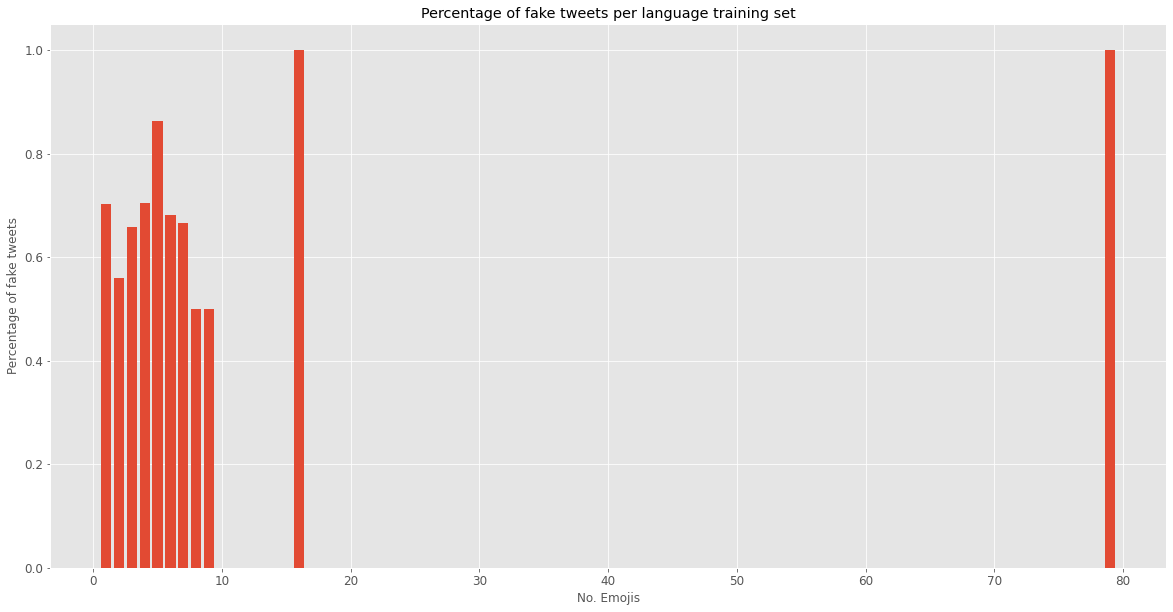

In [13]:
plt.figure(figsize=(20, 10))
plt.style.use('ggplot')
plt.title("Percentage of fake tweets per language training set")
plt.xlabel("No. Emojis")
plt.ylabel("Percentage of fake tweets")
emoji_num = list(emoji_dict.keys())
#print(len(emoji_num))
emoji_fake_pct = list(emoji_dict.values())
plt.bar(emoji_num, emoji_fake_pct)

In [190]:
news_fake = 0
news_real = 0
n_fake = 0
n_real = 0


for i in range(len(df_train)):
    if(df_train.iloc[i]['news'] == 1):
        if(df_train.iloc[i]['label'] == 0):
            news_fake += 1
        else:
            news_real += 1
    else:
        if(df_train.iloc[i]['label'] == 0):
            n_fake += 1
        else:
            n_real += 1
print("\nNews fake = {}\nNews real = {}\nNormal Fake = {}\nNormal Real = {}".format(str(news_fake), str(news_real), str(n_fake), str(n_real)))


News fake = 44
News real = 64
Normal Fake = 9430
Normal Real = 4945


In [147]:
hash_fake = 0
hash_real = 0
n_fake = 0
n_real = 0


for i in range(len(df_train)):
    if(df_train.iloc[i]['num_hashtags'] >= 1):
        if(df_train.iloc[i]['label'] == 0):
            hash_fake += 1
        else:
            hash_real += 1
    else:
        if(df_train.iloc[i]['label'] == 0):
            n_fake += 1
        else:
            n_real += 1
print("\nHash fake = {}\nHash real = {}\nNormal Fake = {}\nNormal Real = {}".format(str(hash_fake), str(hash_real), str(n_fake), str(n_real)))


Hash fake = 5891
Hash real = 4158
Normal Fake = 3583
Normal Real = 851


In [38]:
df_balanced_train.drop(['misspellings'], axis=1)

,index,text,imageIds,language,timestamp,num_emoji,label
0,7858,Wow RT@billmckibben: Boardwalk floating in sec...,sandyA_real_10,en,Mon Oct 29 20:21:37 +0000 2012,0,1
1,7859,@JHP_777 RT @billmckibben: Boardwalk floating ...,sandyA_real_10,en,Tue Oct 30 02:50:36 +0000 2012,0,1
2,7860,#sandy #staysafe RT @billmckibben: Boardwalk f...,sandyA_real_10,en,Mon Oct 29 21:00:36 +0000 2012,0,1
3,7861,Ground Zero #Sandy http://t.co/KA1jNv3I,sandyA_real_04,en,Tue Oct 30 18:47:27 +0000 2012,0,1
4,7862,scary: “@jfporchez: Ground zero http://t.co/wn...,sandyA_real_04,pl,Tue Oct 30 06:20:26 +0000 2012,0,1
...,...,...,...,...,...,...,...
10013,3422,I leave you a shocking image showing how peopl...,sandyA_fake_41,es,Thu Nov 01 01:36:14 +0000 2012,0,0
10014,728,#repost Tomb of the Unknown Soldier continues ...,sandyA_fake_02,en,Mon Oct 29 17:03:23 +0000 2012,0,0
10015,5770,Seems legit? #hurricanesandy --&gt; http://t.c...,sandyA_fake_45,en,Wed Oct 31 00:04:57 +0000 2012,0,0
10016,2347,Sandy is looking pretty fed up. #nyc #nj #conn...,sandyA_fake_48,en,Mon Oct 29 18:27:18 +0000 2012,0,0


<BarContainer object of 16 artists>

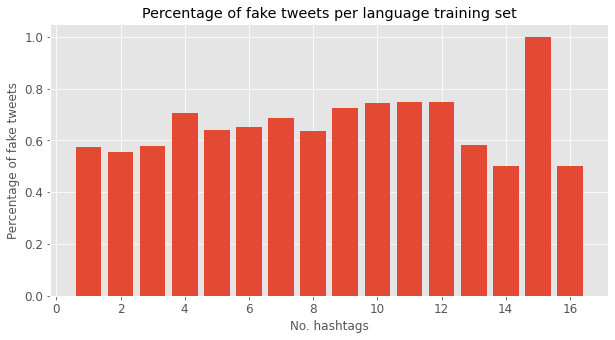

In [27]:
plt.figure(figsize=(10, 5))
plt.style.use('ggplot')
plt.title("Percentage of fake tweets per language training set")
plt.xlabel("No. hashtags")
plt.ylabel("Percentage of fake tweets")
hash_num = list(hash_dict.keys())
#print(len(emoji_num))
hash_fake_pct = list(hash_dict.values())
plt.bar(hash_num, hash_fake_pct)


Misspelt fake = 3271
Misspelt real = 3442
Normal Fake = 1738
Normal Real = 1567
{1: 0.5015432098765432, 2: 0.4450337512054002, 3: 0.5055432372505543, 4: 0.5521885521885522, 5: 0.4961832061068702, 6: 0.5909090909090909, 7: 0.5555555555555556, 8: 0.0, 9: 0.6666666666666666, 10: 0.0}


<BarContainer object of 10 artists>

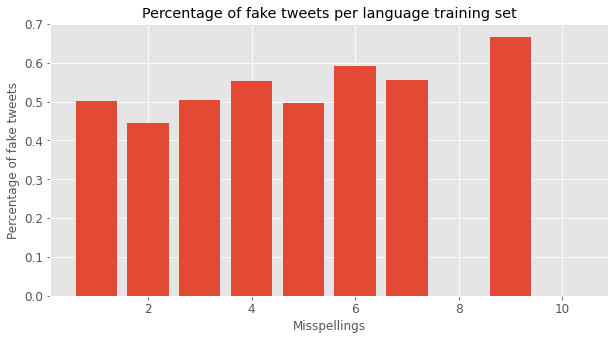

In [53]:
#Balance
misspelt_fake = 0
misspelt_real = 0
n_fake = 0
n_real = 0


for i in range(len(df_balanced_train)):
    if(df_balanced_train.iloc[i]['misspellings'] >= 1):
        if(df_balanced_train.iloc[i]['label'] == 0):
            misspelt_fake += 1
        else:
            misspelt_real += 1
    else:
        if(df_balanced_train.iloc[i]['label'] == 0):
            n_fake += 1
        else:
            n_real += 1
print("\nMisspelt fake = {}\nMisspelt real = {}\nNormal Fake = {}\nNormal Real = {}".format(str(misspelt_fake), str(misspelt_real), str(n_fake), str(n_real)))

m_dict = {}
m_list = []

for j in range(1, 80):
    m_dict[j] = [0, 0]

for i in range(len(df_balanced_train)):
    if(df_balanced_train.iloc[i]['misspellings'] >= 1):
        if(df_balanced_train.iloc[i]['label'] == 1):
            m_dict[df_balanced_train.iloc[i]["misspellings"]][0] += 1
        else:
            m_dict[df_balanced_train.iloc[i]["misspellings"]][1] += 1


for k in range(1,80):
    try:
        m_dict[k] = m_dict[k][1] / (m_dict[k][0] + m_dict[k][1])
    except:
        #print("Not Found:", k)
        del m_dict[k]

print(m_dict)
    
m_dict = dict(sorted(m_dict.items(), reverse=True, key=lambda item: item[1]))

plt.figure(figsize=(10, 5))
plt.style.use('ggplot')
plt.title("Percentage of fake tweets per language training set")
plt.xlabel("Misspellings")
plt.ylabel("Percentage of fake tweets")
misspelt_num = list(m_dict.keys())
#print(len(emoji_num))
m_fake_pct = list(m_dict.values())
plt.bar(misspelt_num, m_fake_pct)

In [34]:
p_fake = 0
p_real = 0
n_fake = 0
n_real = 0


for i in range(len(df_train)):
    if(df_train.iloc[i]['profane'] >= 1):
        if(df_train.iloc[i]['label'] == 0):
            p_fake += 1
        else:
            p_real += 1
    else:
        if(df_train.iloc[i]['label'] == 0):
            n_fake += 1
        else:
            n_real += 1
print("\nProfane fake = {}\nProfane real = {}\nNormal Fake = {}\nNormal Real = {}".format(str(p_fake), str(p_real), str(n_fake), str(n_real)))


Profane fake = 605
Profane real = 255
Normal Fake = 8869
Normal Real = 4754


In [8]:
#Fake and real top used words
from collections import defaultdict, Counter

fake_words = defaultdict(lambda: 0)
real_words = defaultdict(lambda: 0)
total_words = defaultdict(lambda: 0)

for i in range(len(df_train)):
    text = str(df_train.iloc[i]['text']).lower()
    text = text.split()
    if(df_train.iloc[i]['label'] == 0):
        for j in range(len(text)):
            fake_words[text[j]] += 1
            total_words[text[j]] += 1
    else:
        for j in range(len(text)):
            real_words[text[j]] += 1
            total_words[text[j]] += 1


real_words = dict(sorted(real_words.items(), reverse=True, key=lambda item: item[1]))
fake_words = dict(sorted(fake_words.items(), reverse=True, key=lambda item: item[1]))
total_words = dict(sorted(total_words.items(), reverse=False, key=lambda item: item[1]))

words = list(total_words.keys())
for w in words:
    if(total_words[w] < 100):
        del total_words[w]
        try:
            del real_words[w]
        except:
            pass
        
        try:
            del fake_words[w]
        except:
            pass
    


In [9]:
rw = Counter(real_words)
fw = Counter(fake_words)
fake_res = fw - rw
real_res = rw - fw

real_res = {k: real_res[k]/total_words[k] for k in total_words.keys() & real_res}
fake_res = {k: fake_res[k]/total_words[k] for k in total_words.keys() & fake_res}

real_res = dict(sorted(real_res.items(), reverse=True, key=lambda item: item[1]))
fake_res = dict(sorted(fake_res.items(), reverse=True, key=lambda item: item[1]))
real_res


{'hoboken': 1.0,
 'mainstream': 1.0,
 'magazine': 1.0,
 'seaside': 1.0,
 'cuba': 0.9926470588235294,
 'zero': 0.9833333333333333,
 'ground': 0.9833333333333333,
 'cover': 0.9213483146067416,
 'media': 0.8895027624309392,
 'kind': 0.8878504672897196,
 'dear': 0.8714285714285714,
 'talking': 0.8608695652173913,
 'thank': 0.808695652173913,
 'obama': 0.7702702702702703,
 'island': 0.744,
 'help': 0.7017543859649122,
 'power': 0.6946564885496184,
 'flooding': 0.6946564885496184,
 'manhattan': 0.6467065868263473,
 'view': 0.6379310344827587,
 'needs': 0.6363636363636364,
 'suspect': 0.5627240143369175,
 'water': 0.5321637426900585,
 'marathon': 0.4956521739130435,
 'flood': 0.4482758620689655,
 'boston': 0.37142857142857144,
 'via': 0.3611111111111111,
 'bombing': 0.3543307086614173,
 'affected': 0.34328358208955223,
 'nj': 0.3412887828162291,
 'people': 0.3401360544217687,
 'also': 0.31386861313868614,
 'hit': 0.2823529411764706,
 'city': 0.24555160142348753,
 '1': 0.1619047619047619,
 'fl

In [152]:
def bar_dict(d, width, height, title, xlabel, ylabel):
    plt.figure(figsize=(width, height))
    plt.style.use('ggplot')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.bar(list(d.keys()), list(d.values()))

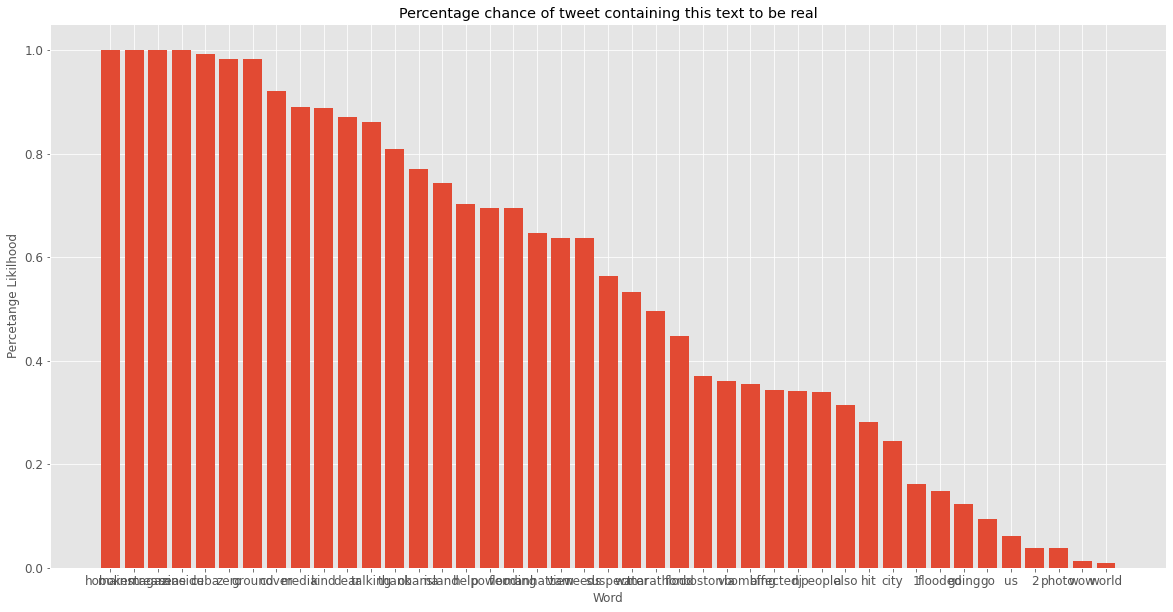

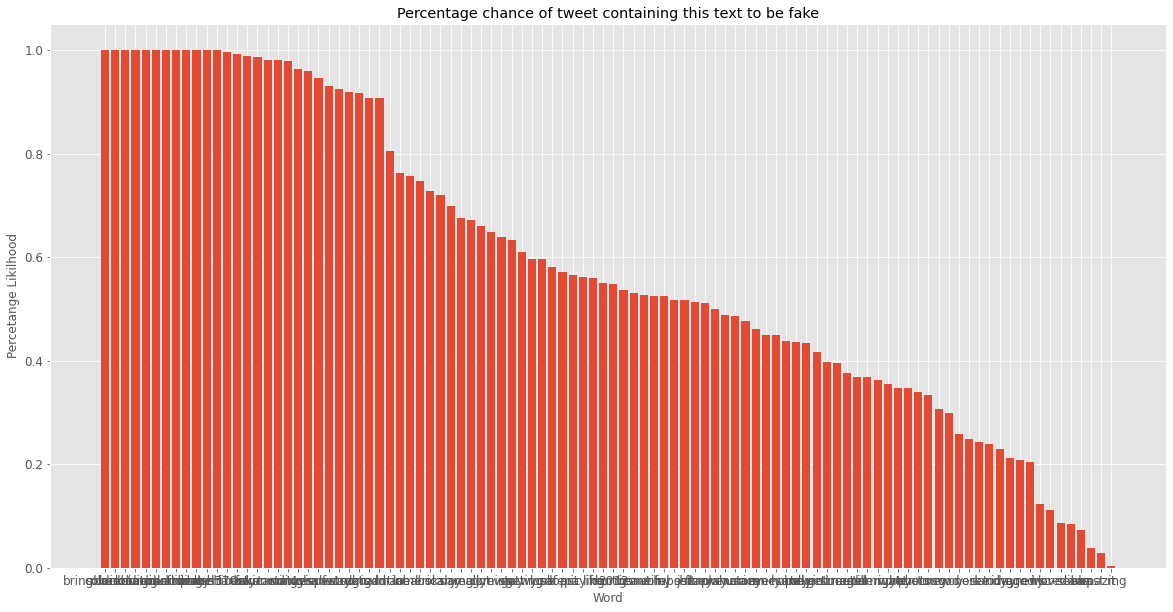

In [11]:
bar_dict(real_res, 20, 10, "Percentage chance of tweet containing this text to be real", "Word", "Percetange Likilhood")
bar_dict(fake_res, 20, 10, "Percentage chance of tweet containing this text to be fake", "Word", "Percetange Likilhood")

In [12]:
print(real_words['world'], fake_words['world'], total_words['world'])
print("Real words of significance: ", len(real_res))
print("Fake words of significance: ", len(fake_res))
#do an extra count on how many tweets these words cover after the 100 limit and after the 50% sig.

57 56 113
Real words of significance:  43
Fake words of significance:  100


In [13]:
sig_real_words = list(k for k, v in real_res.items() if v > 0.5)
sig_fake_words = list(k for k, v in fake_res.items() if v > 0.5)

In [17]:
def significance(data_frame, sig_words, clmn_name):
    sig_found = []
    for tweet in data_frame['text'].values:
        try:
            tweet = tweet.lower()
            if(any(word in tweet for word in sig_words)):
                sig_found.append(1)
            else:
                sig_found.append(0)
        except:
            sig_found.append(0)
    data_frame.insert(4, clmn_name, sig_found, True)
    return data_frame

In [18]:
df_train = significance(df_train, sig_real_words, "significant_real")
df_train = significance(df_train, sig_fake_words, "significant_fake")
df_train


,text,imageIds,timestamp,language,significant_fake,significant_real,misspellings,news_company_found,num_emoji,num_hashtags,profane,retweet,label
0,remember movie Day Tomorrow reminds happening ...,sandyA_fake_46,Mon Oct 29 22:34:01 +0000 2012,es,1,0,0,0,0,1,0,0,0
1,Look Sandy NY Tremendous image hurricane Looks...,sandyA_fake_09,Mon Oct 29 19:11:23 +0000 2012,es,1,0,1,0,0,0,0,1,0
2,Good photo Hurricane Sandy reminds movie Indep...,sandyA_fake_09,Mon Oct 29 18:11:08 +0000 2012,es,1,0,1,0,0,2,0,0,0
3,Scary shit hurricane NY,sandyA_fake_29,Mon Oct 29 19:15:33 +0000 2012,en,1,0,0,0,0,2,1,0,0
4,fave place world nyc hurricane sandy statueofl...,sandyA_fake_15,Mon Oct 29 20:46:02 +0000 2012,en,1,0,2,0,1,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14478,slaps TweetDeck PigFish http co pyHcJn0jwA,pigFish_01,Tue Mar 11 03: 48: 36 +0000 2014,en,0,0,4,0,0,0,0,0,0
14479,New Species Fish found Brazil Really good Phot...,pigFish_01,Mon Mar 10 18: 09: 26 +0000 2014,en,1,0,2,0,0,0,0,0,0
14480,call pigFISH http co 4Bml62OD15,pigFish_01,Mon Mar 10 10: 59: 45 +0000 2014,en,0,0,3,0,0,1,0,0,0
14481,Pigfish shark pork fish http co hQzWGhyDef,pigFish_01,Sun Mar 09 20: 07: 10 +0000 2014,it,1,0,3,0,0,0,0,0,0


In [16]:
count = 0
for tweet in df_train['text'].values:
    try:
        tweet = tweet.lower()
    except: 
        print(count, tweet)
    count += 1

12198 nan


In [54]:
from nltk.corpus import stopwords
#nltk.download('stopwords')
#nltk.download('punkt')
from collections import defaultdict
from nltk.tokenize import word_tokenize
from nltk import pos_tag, download
import time
#download('averaged_perceptron_tagger')

def POS_tagger(data_frame):
    for i in range(len(data_frame)):
        try:
            word_tokens = word_tokenize(data_frame.iloc[i]['text'])
        except:
            print(data_frame.iloc[i])
        pos = pos_tag(word_tokens)
        exclusive_pos  = " ".join(x[1] for x in pos)
        print(pos)


POS_tagger(df_train)


[('¿Se', 'JJ'), ('acuerdan', 'NN'), ('de', 'IN'), ('la', 'FW'), ('película', 'NN'), (':', ':'), ('“', 'JJ'), ('El', 'NNP'), ('día', 'NN'), ('después', 'NN'), ('de', 'IN'), ('mañana', 'FW'), ('”', 'FW'), ('?', '.'), ('Me', 'NNP'), ('recuerda', 'VBZ'), ('a', 'DT'), ('lo', 'JJ'), ('que', 'NN'), ('está', 'FW'), ('pasando', 'NN'), ('con', 'NN'), ('el', 'VBP'), ('huracán', 'NN'), ('#', '#'), ('Sandy', 'NNP'), ('.', '.'), ('http', 'NN'), (':', ':'), ('//t.co/JQQeRPwN', 'NN')]
[('@', 'JJ'), ('milenagimon', 'NN'), (':', ':'), ('Miren', 'NNP'), ('a', 'DT'), ('Sandy', 'NNP'), ('en', 'FW'), ('NY', 'NNP'), ('!', '.'), ('Tremenda', 'NNP'), ('imagen', 'NN'), ('del', 'NN'), ('huracán', 'NN'), ('.', '.'), ('Parece', 'NNP'), ('el', 'IN'), ('``', '``'), ('Día', 'NNP'), ('de', 'FW'), ('la', 'FW'), ('Independencia', 'FW'), ('2', 'CD'), ("''", "''"), ('http', 'NN'), (':', ':'), ('//t.co/41jUweux', 'JJ'), ('REAL', 'NNP'), ('!', '.'), ('RT', 'NNP'), ('.', '.')]
[('Buena', 'NNP'), ('la', 'NNP'), ('foto', 'VBD'

KeyboardInterrupt: 

{1: 0.5766233766233766, 2: 0.5547445255474452, 3: 0.5787641427328112, 4: 0.7057728119180633, 5: 0.6389776357827476, 6: 0.6524064171122995, 7: 0.6884057971014492, 8: 0.6352941176470588, 9: 0.7272727272727273, 10: 0.7441860465116279, 11: 0.75, 12: 0.75, 13: 0.5833333333333334, 14: 0.5, 15: 1.0, 16: 0.5}


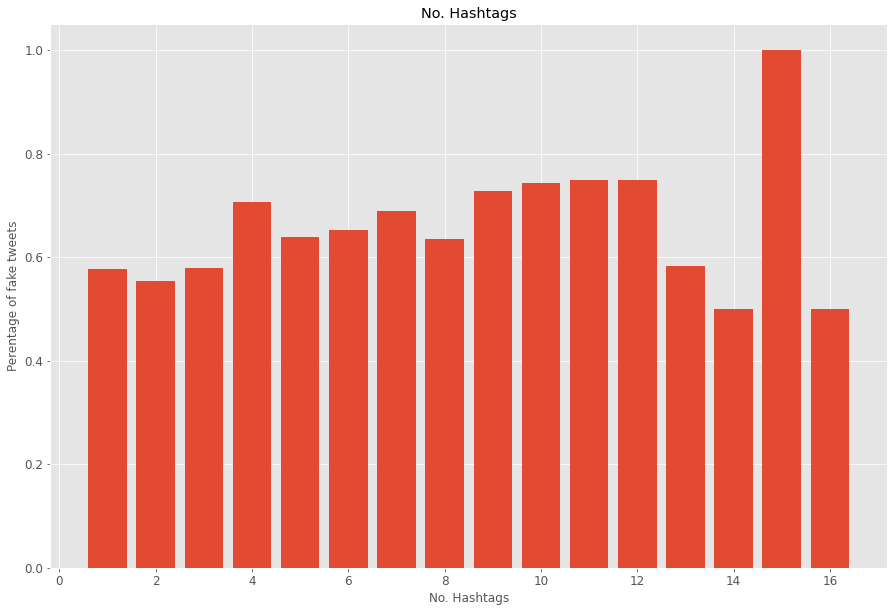

In [153]:
hash_dict = {}
x = []
y = []

for i in range(len(df_train)):
    pass

for j in range(1, 80):
    hash_dict[j] = [0, 0]

for i in range(len(df_train)):
    if(df_train.iloc[i]['num_hashtags'] >= 1):
        if(df_train.iloc[i]['label'] == 1):
            hash_dict[df_train.iloc[i]["num_hashtags"]][0] += 1
        else:
            hash_dict[df_train.iloc[i]["num_hashtags"]][1] += 1


for k in range(1,80):
    try:
        hash_dict[k] = hash_dict[k][1] / (hash_dict[k][0] + hash_dict[k][1])
    except:
        #print("Not Found:", k)
        del hash_dict[k]

print(hash_dict)
    
hash_dict = dict(sorted(hash_dict.items(), reverse=True, key=lambda item: item[1]))
bar_dict(hash_dict, 15, 10, "No. Hashtags", "No. Hashtags", "Perentage of fake tweets")

{1: 0.4176519109155898, 2: 0.3920265780730897, 3: 0.4169653524492234, 4: 0.5446685878962536, 5: 0.5089285714285714, 6: 0.5217391304347826, 7: 0.5425531914893617, 8: 0.42592592592592593, 9: 0.5945945945945946, 10: 0.5925925925925926, 11: 0.631578947368421, 12: 0.6428571428571429, 13: 0.2857142857142857, 14: 0.5, 15: 1.0, 16: 0.5}


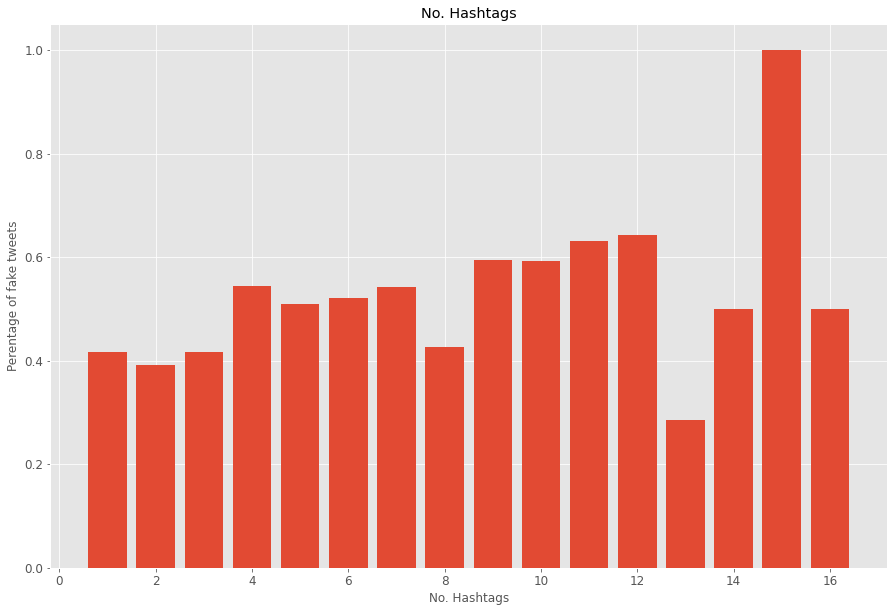

In [154]:
hash_dict = {}
x = []
y = []

for i in range(len(df_balanced_train)):
    pass

for j in range(1, 80):
    hash_dict[j] = [0, 0]

for i in range(len(df_balanced_train)):
    if(df_balanced_train.iloc[i]['num_hashtags'] >= 1):
        if(df_balanced_train.iloc[i]['label'] == 1):
            hash_dict[df_balanced_train.iloc[i]["num_hashtags"]][0] += 1
        else:
            hash_dict[df_balanced_train.iloc[i]["num_hashtags"]][1] += 1


for k in range(1,80):
    try:
        hash_dict[k] = hash_dict[k][1] / (hash_dict[k][0] + hash_dict[k][1])
    except:
        #print("Not Found:", k)
        del hash_dict[k]

print(hash_dict)
    
hash_dict = dict(sorted(hash_dict.items(), reverse=True, key=lambda item: item[1]))
bar_dict(hash_dict, 15, 10, "No. Hashtags", "No. Hashtags", "Perentage of fake tweets")

In [180]:
df_train = pd.read_csv("train_v0.3.csv")
df_train = df_train.iloc[:, 1:]
df_train
df_train.text = df_train.text.astype(str)

In [100]:
df_test = pd.read_csv("test_v2.2.csv")
df_test = df_test.iloc[:, 1:]
df_test
df_test.text = df_test.text.astype(str)

(array([3.880e+02, 9.380e+02, 1.188e+03, 1.412e+03, 1.444e+03, 1.467e+03,
        1.405e+03, 0.000e+00, 1.525e+03, 1.339e+03, 1.058e+03, 9.890e+02,
        5.550e+02, 3.820e+02, 0.000e+00, 1.950e+02, 9.600e+01, 4.100e+01,
        1.800e+01, 2.400e+01, 3.000e+00, 0.000e+00, 0.000e+00, 8.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 4.000e+00]),
 array([ 1.  ,  1.86,  2.72,  3.58,  4.44,  5.3 ,  6.16,  7.02,  7.88,
         8.74,  9.6 , 10.46, 11.32, 12.18, 13.04, 13.9 , 14.76, 15.62,
        16.48, 17.34, 18.2 , 19.06, 19.92, 20.78, 21.64, 22.5 , 23.36,
        24.22, 25.08, 25.94, 26.8 , 27.66, 28.52, 29.38, 30.24, 31.1 ,
        31.96, 32.82, 33.68, 34.54, 35.4 , 36.26, 37.12, 37.98, 38.84,
        39.7 , 40.56,

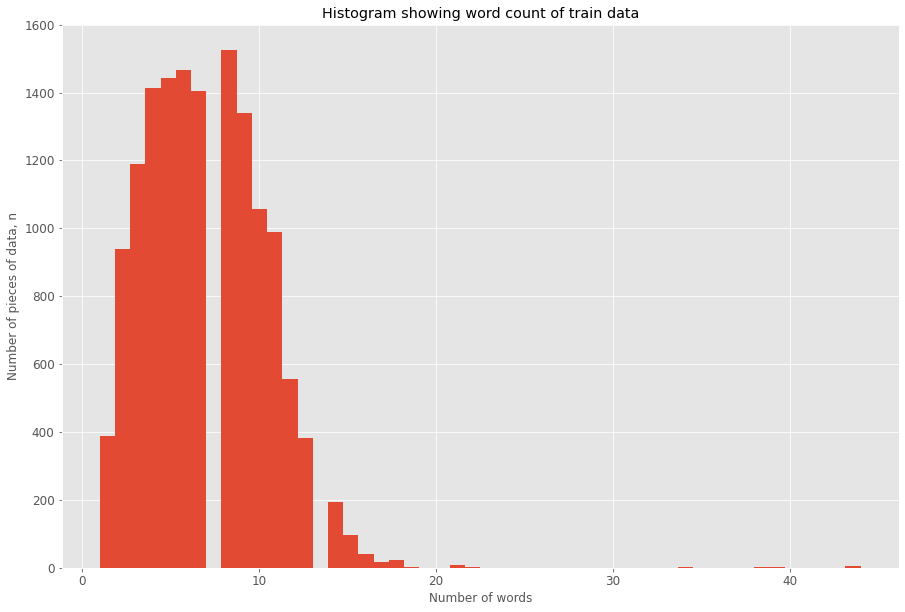

In [107]:
X_lens = [len(str(x).split()) for x in df_train['text'].values]

plt.figure(figsize=(15, 10))
plt.title("Histogram showing word count of train data")
plt.ylabel("Number of pieces of data, n")
plt.xlabel("Number of words")

plt.hist(X_lens, 50)

In [122]:
count = 0
for i in X_lens:
    if(i>16):
        count+=1
count, len(X_lens)

(61, 14483)

In [27]:
df_train

,text,imageIds,timestamp,language,significant_fake,significant_real,misspellings,news_company_found,num_emoji,num_hashtags,profane,retweet,label
0,remember movie Day Tomorrow reminds happening ...,sandyA_fake_46,Mon Oct 29 22:34:01 +0000 2012,es,1,0,0,0,0,1,0,0,0
1,Look Sandy NY Tremendous image hurricane Looks...,sandyA_fake_09,Mon Oct 29 19:11:23 +0000 2012,es,1,0,1,0,0,0,0,1,0
2,Good photo Hurricane Sandy reminds movie Indep...,sandyA_fake_09,Mon Oct 29 18:11:08 +0000 2012,es,1,0,1,0,0,2,0,0,0
3,Scary shit hurricane NY,sandyA_fake_29,Mon Oct 29 19:15:33 +0000 2012,en,1,0,0,0,0,2,1,0,0
4,fave place world nyc hurricane sandy statueofl...,sandyA_fake_15,Mon Oct 29 20:46:02 +0000 2012,en,1,0,2,0,1,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14478,slaps TweetDeck PigFish http co pyHcJn0jwA,pigFish_01,Tue Mar 11 03: 48: 36 +0000 2014,en,0,0,4,0,0,0,0,0,0
14479,New Species Fish found Brazil Really good Phot...,pigFish_01,Mon Mar 10 18: 09: 26 +0000 2014,en,1,0,2,0,0,0,0,0,0
14480,call pigFISH http co 4Bml62OD15,pigFish_01,Mon Mar 10 10: 59: 45 +0000 2014,en,0,0,3,0,0,1,0,0,0
14481,Pigfish shark pork fish http co hQzWGhyDef,pigFish_01,Sun Mar 09 20: 07: 10 +0000 2014,it,1,0,3,0,0,0,0,0,0


In [146]:
import time 
month_dict = {
    'Jan': '01',
    'Feb': '02',
    'Mar': '03',
    'Apr': '04',
    'May': '05',
    'Jun': '06',
    'Jul': '07',
    'Aug': '08',
    'Sep': '09',
    'Oct': '10',
    'Nov': '11',
    'Dec': '12'
}
str_time = "Tue Mar 11 23: 59: 22 +0000"
str_time = str_time.split()
for i in range(len(str_time)):
    if(str_time[i] in month_dict.keys()):
        str_time[i] = month_dict[str_time[i]]
        break

str_time = str_time[2] + '.' + str_time[1] +'.' +str_time[len(str_time)-1]+' '+str_time[3][:2] + ':' +str_time[3][3:5] +':'+ str_time[3][6:]
str_time

# pattern = '%d.%m.%Y %H:%M:%S'
# epoch = int(time.mktime(time.strptime(str_time, pattern)))
# print(epoch)

'11.03.+0000 23::'

In [32]:
z = 49
df_train.iloc[z]['text'], df_train.iloc[z]['pos']

('shark nyc streets sandy hurricane', 'NN JJ VBZ JJ NN')

In [35]:
import nltk
from nltk.stem import WordNetLemmatizer 
# nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

x = df_train.iloc[z]['text']
y = df_train.iloc[z]['pos']

word_tokens = nltk.word_tokenize(x)
pos_tokens = nltk.word_tokenize(y)
lem = []
for i in range(len(word_tokens)):
    posTag = ''
    if(pos_tokens[i][:2] == 'JJ'):
        posTag = 'a'
    elif(pos_tokens[i][:2] == 'NN'):
        posTag = 'n'
    elif(pos_tokens[i][:2] == 'VB'):
        posTag = 'v' 
    elif(pos_tokens[i][:2] == 'RB'):
        posTag = 'r'
    try:
        lem.append(lemmatizer.lemmatize(word_tokens[i], pos=posTag))
    except:
        lem.append(lemmatizer.lemmatize(word_tokens[i]))

lemmatized_output = " ".join(lem)
lemmatized_output

'shark nyc streets sandy hurricane'